In [1]:
import matplotlib.pyplot as plt
import numpy as np

## APLOT #1-2

Total recovered for A=0.000002: 6162.97
Total infected during the epidemic for A=0.000002: 6233.34
Total recovered for A=0.000006: 22358.11
Total infected during the epidemic for A=0.000006: 25015.63
Total recovered for A=0.000010: 42056.91
Total infected during the epidemic for A=0.000010: 43844.30
Total recovered for A=0.000014: 47452.21
Total infected during the epidemic for A=0.000014: 48171.20
Total recovered for A=0.000018: 49002.71
Total infected during the epidemic for A=0.000018: 49398.03
Total recovered for A=0.000022: 49522.27
Total infected during the epidemic for A=0.000022: 49797.39
Total recovered for A=0.000026: 49712.00
Total infected during the epidemic for A=0.000026: 49932.41
Total recovered for A=0.000030: 49786.55
Total infected during the epidemic for A=0.000030: 49977.97
Total recovered for A=0.000034: 49818.89
Total infected during the epidemic for A=0.000034: 49993.05
Total recovered for A=0.000038: 49835.03
Total infected during the epidemic for A=0.000038: 4

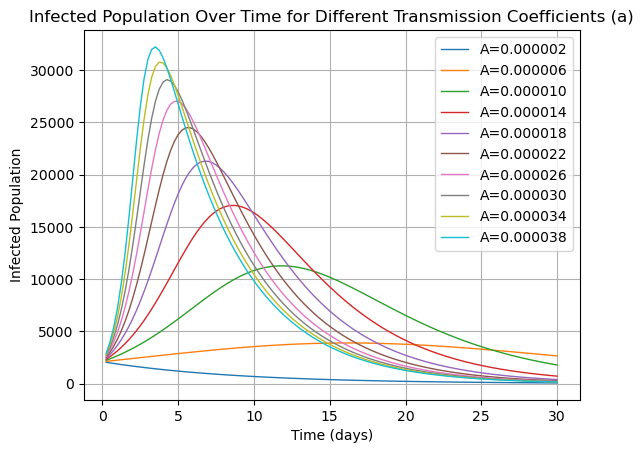

In [2]:
tinitial = 0
tfinal = 30
S_init = 45400
I_init = 2100
R_init = 2500
numberofsteps = 120
deltat = (tfinal - tinitial) / numberofsteps

A_values = np.arange(0.000002, 0.00004, 0.000004)

#APLOT loop
for A in A_values:
    # reset for each a value
    S = S_init
    I = I_init
    R = R_init
    t = tinitial
    
    times = []
    I_values = []

    # SIR Loop! (remains largely unchanged, it just resides in the a loop)
    for k in range(numberofsteps):

        Iprime = A * S * I - I / 5 
        Sprime = -A * S * I
        Rprime = I / 5
        
        deltaI = Iprime * deltat
        deltaS = Sprime * deltat
        deltaR = Rprime * deltat

        I += deltaI
        S += deltaS
        R += deltaR
        t += deltat

        times.append(t)
        I_values.append(I)
    
    total_infected_pop = I + R
    
    # Plot ONLY the infected population for any value a
    plt.plot(times, I_values, lw=1, label=f'A={A:.6f}')
    
    # Print statements for total infected and recovered
    print(f"Total recovered for A={A:.6f}: {R:.2f}")
    print(f"Total infected during the epidemic for A={A:.6f}: {total_infected_pop:.2f}")

# Plot formatting
plt.xlabel('Time (days)')
plt.ylabel('Infected Population')
plt.title('Infected Population Over Time for Different Transmission Coefficients (a)')
plt.legend(loc='upper right')  # Ensure each line gets a unique label in the legend
plt.grid(True)
plt.show()

## #3

As A increases in magnitude, the number of infected climbs at progressively steeper rates.  This means that increasing A will step up the peak infections to an earlier and earlier date.

## #4

I've added in a print statement to print out the accumulated infected and recovered for a given A value.  As A increases, the total number of infected people reaches a threshold of 50,000 fairly quickly, at roughly A = 0.000018.  In order to even calculate the total infected, We need to accumulate Recovered individuals as well.  A recovered individual would have been infected at some point, so we need to add it to I.

## #5 (LPLOT)

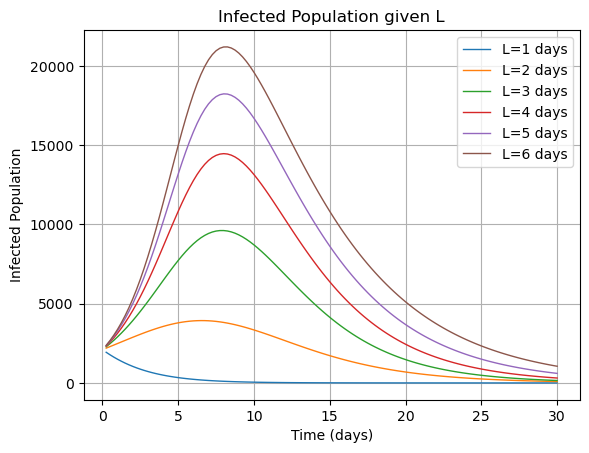

In [3]:

tinitial = 0
tfinal = 30
S_init = 45400
I_init = 2100
R_init = 2500
numberofsteps = 120
deltat = (tfinal - tinitial) / numberofsteps
A = 0.000015

# L value range
L_values = np.arange(1, 7, 1)  # Try L values of 3, 6, 9, 12, 15 days

plt.figure()

# LPLOT loop
for L in L_values:
    # Reset initial conditions for each L value
    S = S_init
    I = I_init
    R = R_init
    t = tinitial
    
    times = []
    I_values = []

    # SIR Loop! (remains largely unchanged, it just resides in the L loop)
    for k in range(numberofsteps):

        Iprime = A * S * I - I / L
        Sprime = -A * S * I
        Rprime = I / L
        
        deltaI = Iprime * deltat
        deltaS = Sprime * deltat
        deltaR = Rprime * deltat

        I += deltaI
        S += deltaS
        R += deltaR
        t += deltat

        times.append(t)
        I_values.append(I)
    
    # Plot ONLY the infected population for any value of L
    plt.plot(times, I_values, lw=1, label=f'L={L} days')

plt.xlabel('Time (days)')
plt.ylabel('Infected Population')
plt.title('Infected Population given L')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## #6

L, the duration of infection, or how long an individual is infected, increasing over time, will cause the epidemic to peak higher in terms of total infected, but no earlier.  This is incrontrast to an increasing A or contact coefficient.

## #7

Modifying the Lvalues to range between 1 and 6 days provides plots that vary greatly in terms of total infected.  the big change happens between a 2 day infection and a 3 day infection.  This is where infections appear to shoot up, even from an increase in 1 day of infected duration.  I would expect S to drop dramatically when infections spike due to longer infected periods.  This would be a result of higher PEAK infected periods, where a large majority is infected simultaneously, and heading towards recovered, thus reducing S values.

## #8

Increasing L increases the total infected for the pandemic, similarly to increasing A.  This is due to the fact that individuals are infectious for longer, thus increasing the likelyhood of spreading the infection, similarly to an increaseing contact coeeficient.

## #9-12

Using higher values of A and L, I can model a epidemic that peaks early and with a high peak infection threshold.  A lower value of A and a similar value of L will result in a epidemic that peaks later but with a similar magnitude.